In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("Laptop_price.csv")
print(df)


      Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0      Asus         3.830296        16               512    11.185147   
1      Acer         2.912833         4              1000    11.311372   
2    Lenovo         3.241627         4               256    11.853023   
3      Acer         3.806248        16               512    12.280360   
4      Acer         3.268097        32              1000    14.990877   
..      ...              ...       ...               ...          ...   
995      HP         3.343584         4              1000    12.587095   
996    Dell         2.780555         8               256    12.679356   
997    Dell         3.200569         4               512    12.666315   
998    Asus         1.604182         8               256    11.215581   
999  Lenovo         1.711980         4               256    16.561498   

       Weight         Price  
0    2.641094  17395.093065  
1    3.260012  31607.605919  
2    2.029061   9291.023542  
3  

In [5]:
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
print(df)


      Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
0      Asus         3.830296        16               512    11.185147   
1      Acer         2.912833         4              1000    11.311372   
2    Lenovo         3.241627         4               256    11.853023   
3      Acer         3.806248        16               512    12.280360   
4      Acer         3.268097        32              1000    14.990877   
..      ...              ...       ...               ...          ...   
995      HP         3.343584         4              1000    12.587095   
996    Dell         2.780555         8               256    12.679356   
997    Dell         3.200569         4               512    12.666315   
998    Asus         1.604182         8               256    11.215581   
999  Lenovo         1.711980         4               256    16.561498   

       Weight         Price  
0    2.641094  17395.093065  
1    3.260012  31607.605919  
2    2.029061   9291.023542  
3  

In [8]:
df['Brand']=df['Brand'].astype('category')
df['Brand']=df['Brand'].cat.codes
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3.830296,16,512,11.185147,2.641094,17395.093065
1,0,2.912833,4,1000,11.311372,3.260012,31607.605919
2,4,3.241627,4,256,11.853023,2.029061,9291.023542
3,0,3.806248,16,512,12.280360,4.573865,17436.728334
4,0,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,3,3.343584,4,1000,12.587095,3.162399,31593.668017
996,2,2.780555,8,256,12.679356,3.750265,9149.521832
997,2,3.200569,4,512,12.666315,3.392612,16552.404779
998,1,1.604182,8,256,11.215581,3.857613,9407.473459


In [9]:
X =df[['Processor_Speed','RAM_Size','Storage_Capacity']] ## independence variables 
y=df[['Price']] ## dedependence variables 

## splitting data

In [10]:
X =df[['Processor_Speed','RAM_Size','Storage_Capacity']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
X_train


,Processor_Speed,RAM_Size,Storage_Capacity
29,3.799639,8,1000
535,3.298004,16,512
695,2.433129,4,512
557,3.313144,32,512
836,3.162279,16,512
...,...,...,...
106,1.953589,32,256
270,2.096943,16,1000
860,2.884506,4,1000
435,2.074887,4,256


In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=100, random_state=42
)
model.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)

In [14]:
print(y_pred)

[10587.15254466 31425.13038091  9667.48223057  9103.4626904
 32154.44830642 31518.41038511 10436.25709236 16910.93935096
 18697.54158382 32455.1893393   9943.63748382 10612.01512897
 33059.07192464  9251.56584735 17071.28043933  8961.33471467
 32043.5568524  31879.12101335 10703.83441172 32230.21339224
 10568.47956366 10493.65425301  9112.84457234 10156.02979764
  9467.99245654 17410.70262151 10767.10447665 18460.22223297
 10592.64044456 32601.99331131 16802.10110662 32888.32224387
 16616.50356988 31979.06766762 31639.10372003 10425.48809213
 31184.91622545  9263.82768111 32758.35990887 17352.7947931
 32098.40458575  9774.37376055 17435.06342584 31782.86131319
 17292.59023451 16907.31640784 32743.90808666 16940.3871203
  9665.92715141 16923.27218055 16686.72819211 31553.77975004
  9737.54868507 10589.24235328 31906.4787385  32825.67740942
 31505.22979693 31640.25447681  9162.26610575 32387.16796382
 17407.05635759 31557.19740041 31816.93681131 10480.35430235
  9639.44618144 32059.39210

In [15]:
from sklearn.metrics import r2_score
print("Accuracy:",(r2_score(y_test, y_pred))*100)

Accuracy: 99.94532709301707


In [25]:
new_laptop = pd.DataFrame([{
    "Processor_Speed":3.830295706209031,
    "RAM_Size": 16,
    "Storage_Capacity": 512,

}])
predicted_price = model.predict(new_laptop)
print("Predicted Price for new_laptop:", predicted_price[0])


Predicted Price for new_laptop: 17449.257079373285


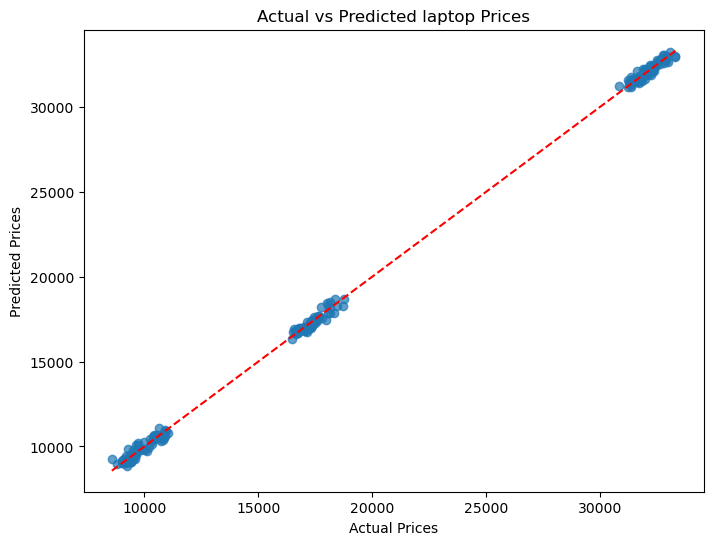

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted laptop Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


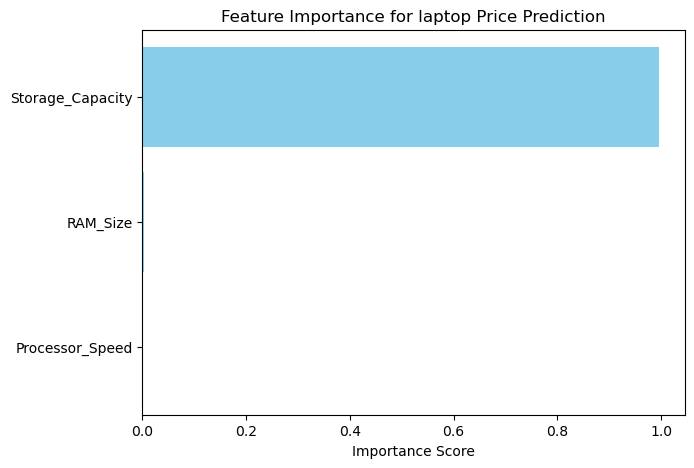

Processor_Speed: 0.0007
RAM_Size: 0.0035
Storage_Capacity: 0.9958


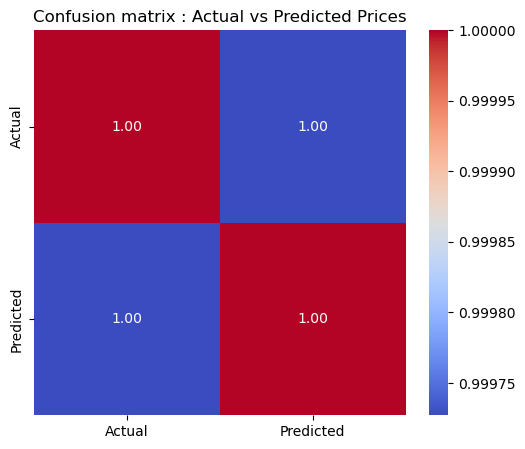

In [18]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(7,5))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.title("Feature Importance for laptop Price Prediction")
plt.show()

for feat, score in zip(features, importances):
    print(f"{feat}: {score:.4f}")

# 10. --- Matrix Visualization (confusion matrix ) ---
results_df = pd.DataFrame({
    "Actual": y_test.values.ravel() if hasattr(y_test, "values") else y_test.ravel(),
    "Predicted": y_pred.ravel()
})

plt.figure(figsize=(6,5))
sns.heatmap(results_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Confusion matrix : Actual vs Predicted Prices")
plt.show()


In [19]:
import pickle

In [20]:
laptop_sales_data=model
with open('laptop_sales_data.pkl','wb') as file:
    pickle.dump( model,file)
    print('model saved are succesfull')

model saved are succesfull


In [21]:
new_laptop = pd.DataFrame([{
    "Processor_Speed":8 ,
    "RAM_Size": 32,
    "Storage_Capacity":500 ,
}])

In [22]:
new_laptop

,Processor_Speed,RAM_Size,Storage_Capacity
0,8,32,500


In [23]:
predicted_price = model.predict(new_laptop)
print("Predicted Price for new_laptop:", predicted_price[0])

Predicted Price for new_laptop: 18509.032462618758


In [24]:
prediction = model.predict(new_laptop)
print(prediction)

[18509.03246262]
